In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%config InlineBackend.figure_format = 'svg'
from math import sqrt
import warnings
warnings.simplefilter('ignore')

In [2]:
import os

In [3]:
concentrations_df = pd.read_excel('433, 436 _NH3 concentrations.xlsx', sep='\t')
concentrations_df = concentrations_df[1:]

In [4]:
concentrations_df

,CurveName,Consentration,Time max
1,0 14.44.40,0,5.5
2,1 14.45.33,0,11
3,2 14.51.04,0,16.5
4,3 14.56.34,0,22
5,4 15.02.05,0,27.5
6,5 15.07.35,0,33
7,6 15.13.06,0,38.5
8,7 15.18.36,0,44
9,8 15.24.07,100,49.5
10,9 15.29.38,100,55


In [5]:
concentrations = np.array(concentrations_df)[:, 1]
names = np.array(concentrations_df)[:, 0]

In [6]:
curve_dict = {}

In [7]:
for i in range(0, len(names)):
    curve_dict[names[i]] = int(concentrations[i])

In [8]:
d = '433_woM_NH3_26.08'
dfs_dict = {}

for path in os.listdir(d):
    dfs = []
    pixel_path = os.path.join(d, path)
    
    for file in sorted(os.listdir(pixel_path), key=lambda x: int(x.split(' ')[0])):
        concentrations_list = []
        concentrations_list.append(curve_dict[file[:-4]])

        curve_path = os.path.join(pixel_path, file)
        df = pd.read_csv(curve_path, sep='\t')
        
        df['SDAmpers'][1:] = df['SDAmpers'][1:].apply(float)
        df['TimeStamp'][1:] = df['TimeStamp'][1:].apply(float)*0.001
        
        df['Concentrations'] = concentrations_list*len(df) 
        dfs.append(df[['TimeStamp', 'SDAmpers', 'Concentrations']][1:])

    dfs_dict[path] = dfs

In [9]:
from _plotly_future_ import v4_subplots 
from plotly.offline import init_notebook_mode, iplot
import plotly

import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

In [10]:
traces = []
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']

for N in [0, 10, 25, 30, 37, 47]:
    for pixel in pixels:
        traces.append(
            go.Scatter(
                x=dfs_dict[pixel][N].TimeStamp,
                y=dfs_dict[pixel][N].SDAmpers, 
                name = 'P{}C{}'.format(pixel[-1], dfs_dict[pixel][N].Concentrations[1]),
                visible = (pixel == pixels[0]),
                mode = 'lines'
        ))

buttons = []
for N in range(0, len(pixels)): 
    buttons.append(
        dict(
             args=['visible', [False]*N + [True] + [False]*(len(pixels)-1-N)],
             label='{}'.format(pixels[N]),
             method='restyle'
        )
    )
        
layout = go.Layout(
    title='Зависимость тока от времени для разных концентраций. ',
    yaxis_title='Сила тока, А',
    xaxis_title='Время, с',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=buttons
        ),
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [11]:
traces = []
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']

for pixel in pixels:
    for N in [0, 25, 37, 47]:
        traces.append(
            go.Scatter(
                x=dfs_dict[pixel][N].TimeStamp,
                y=dfs_dict[pixel][N].SDAmpers, 
                name = 'P{}C{}'.format(pixel[-1], dfs_dict[pixel][N].Concentrations[1]),
                visible = (N == 0),
                mode = 'lines'
        ))

buttons = []
concentrations_list = [0, 100, 200, 500, 800, 1000, 1500, 80, 1]

for N in range(0, len(concentrations_list)): 
    buttons.append(
        dict(
             args=['visible', [False]*N + [True] + [False]*(len(concentrations_list)-1-N)],
             label='Concentration = {}'.format(concentrations_list[N]),
             method='restyle'
        )
    )        
        
layout = go.Layout(
    title='Сравнение кривых тока для разных датчиков при одной концентрации',
    yaxis_title='Сила тока, А',
    xaxis_title='Время, с',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=buttons,
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [12]:
traces = []
for N in np.linspace(0, 7, 8).astype('int64'):
    traces.append(
            go.Scatter(
                x = dfs_dict['Pixel 3'][N].TimeStamp,
                y = dfs_dict['Pixel 3'][N].SDAmpers,
                name = 'P{}C{}'.format('3', dfs_dict[pixel][N].Concentrations[1]),
                mode = 'lines'
            ))



layout = go.Layout(
    title='Сравнение кривой тока для одной концентрации и одного датчика (№3)',
    yaxis_title='Сила тока, А',
    xaxis_title='Время, с',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1),
    ]))

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [13]:
from itertools import groupby
l = [len(list(group)) for key, group in groupby(concentrations.astype(int))]

In [14]:
traces = []
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']
x = np.linspace(0, 48, 49).astype('int64')
try:
    for N in x:
        traces.append(
            go.Scatter(
                x=dfs_dict['Pixel 5'][N].TimeStamp,
                y=dfs_dict['Pixel 5'][N].SDAmpers, 
                name = 'P{}C{}'.format('1', dfs_dict[pixel][N].Concentrations[1]),
                visible = (N in x[:20]),
                mode = 'lines'
        ))
except:
    print('')

buttons = []
concentrations_list = [0, 100, 200, 500, 800, 1000, 1500, 80, 1]

for N in range(0, len(concentrations_list)): 
    buttons.append(
        dict(
             args=['visible', [concentrations_list[N]]*len(x) == concentrations.astype(int)],
             label='Concentration = {}'.format(concentrations_list[N]),
             method='restyle'
        )
    )        
        
layout = go.Layout(
    title='Сравнение кривых тока для датчика №1 при разных концентрациях',
    yaxis_title='Сила тока, А',
    xaxis_title='Время, с',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=buttons,
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [15]:
from scipy import stats

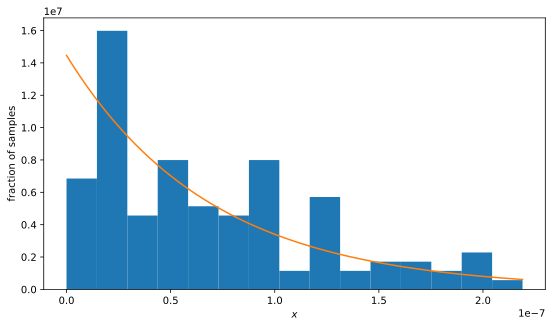

In [16]:
x = dfs_dict['Pixel 1'][0]['SDAmpers']
x = x.astype(float) - x.min()
sp = np.linspace(x.min(), x.max(), 200)
pdf = stats.expon(loc=x.min(), scale=x.mean()).pdf(sp)
plt.figure(figsize=(9,5))
plt.hist(x, density=True, bins=15)
plt.plot(sp, pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.savefig('fig4.png')

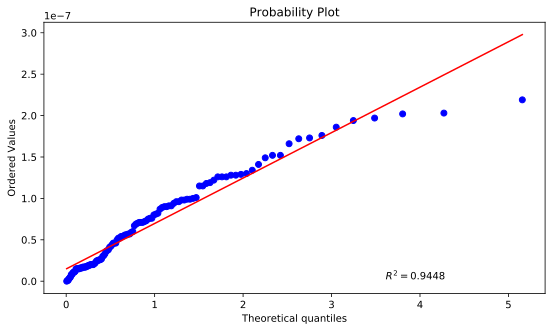

In [17]:
plt.figure(figsize=(9,5))
res = stats.probplot(x, plot=plt, dist='expon', rvalue=True)
plt.savefig('fig5.png')

In [18]:
from scipy.optimize import curve_fit

def func(x, A, beta, C):
    return A*np.exp(-beta*x) + C

def approximated(x, y):
    popt, _ = curve_fit(func, x, y, maxfev=10**6)    
    A, beta, C = popt
    return func(x, A, beta, C), popt

In [19]:
import copy
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']
dfs_app_dict = copy.deepcopy(dfs_dict)

for pixel in pixels:

    for i in range(0, len(concentrations)):
        
        x = dfs_app_dict[pixel][i]['TimeStamp'].astype(float)
        y = dfs_app_dict[pixel][i]['SDAmpers'].astype(float)
        dfs_app_dict[pixel][i]['SDAmpers'] = approximated(x, y)[0]

In [20]:
traces = []

traces.append(
        go.Scatter(
            x = dfs_app_dict['Pixel 3'][42].TimeStamp,
            y = dfs_app_dict['Pixel 3'][42].SDAmpers
        )
)

traces.append(
        go.Scatter(
            x = dfs_dict['Pixel 3'][42].TimeStamp,
            y = dfs_dict['Pixel 3'][42].SDAmpers
        )
)


fig = {'data': traces}
iplot(fig, show_link=False)

In [21]:
minimums = dict.fromkeys(pixels, 1)
for pixel in pixels:
    for i in dfs_app_dict[pixel]:
        if minimums[pixel] > i.SDAmpers.min():
            minimums[pixel] = i.SDAmpers.min()

In [22]:
traces = []
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']

for N in [0, 25, 37, 47]:
    for pixel in pixels:
        traces.append(
            go.Scatter(
                x=dfs_app_dict[pixel][N].TimeStamp,
                y=dfs_app_dict[pixel][N].SDAmpers,# - minimums[pixel], 
                name = 'P{}C{}'.format(pixel[-1], dfs_app_dict[pixel][N].Concentrations[1]),
                visible = (pixel == pixels[0]),
                mode = 'lines'
        ))

buttons = []
for N in range(0, len(pixels)): 
    buttons.append(
        dict(
             args=['visible', [False]*N + [True] + [False]*(len(pixels)-1-N)],
             label='{}'.format(pixels[N]),
             method='restyle'
        )
    )
        
layout = go.Layout(
    title='Зависимость тока от времени для разных концентраций. ',
    yaxis_title='Сила тока, А',
    xaxis_title='Время, с',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=buttons
        ),
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [23]:
traces = []
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']

try:
    for N in range(0, 49):
        for pixel in pixels:
            traces.append(
                go.Scatter(
                    x=dfs_app_dict[pixel][N].TimeStamp,
                    y=dfs_app_dict[pixel][N].SDAmpers,# - minimums[pixel],
                    name = 'P{}C{}'.format(pixel[-1], dfs_app_dict[pixel][N].Concentrations[1]),
                    visible = (pixel == pixels[0]),
                    mode = 'lines'
            ))
except:
    print('list out of range')
buttons = []
for N in range(0, len(pixels)): 
    buttons.append(
        dict(
             args=['visible', [False]*N + [True] + [False]*(len(pixels)-1-N)],
             label='{}'.format(pixels[N]),
             method='restyle'
        )
    )
        
layout = go.Layout(
    title='Зависимость тока от времени для разных концентраций. ',
    yaxis_title='Сила тока, А',
    xaxis_title='Время, с',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=buttons
        ),
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [24]:
import copy
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']
dfs_params_dict = copy.deepcopy(dfs_dict)

for pixel in pixels:

    for i in range(0, len(concentrations)):
        try:
            x = dfs_params_dict[pixel][i]['TimeStamp'].astype(float)
            y = dfs_params_dict[pixel][i]['SDAmpers'].astype(float)# - minimums[pixel]

            dfs_params_dict[pixel][i]['A'] = approximated(x, y)[1][0]
            dfs_params_dict[pixel][i]['beta'] = approximated(x, y)[1][1]
            dfs_params_dict[pixel][i]['C'] = approximated(x, y)[1][2]

            dfs_params_dict[pixel][i].drop(dfs_params_dict[pixel][i].index[1:], inplace = True) 

            del dfs_params_dict[pixel][i]['SDAmpers']
            del dfs_params_dict[pixel][i]['TimeStamp']
            
        except:
            print('')

In [25]:
df_dict = {}
#df = dfs_params_dict['Pixel 1'][0]
for pixel in pixels:
    df = dfs_params_dict[pixel][0]
    for i in dfs_params_dict[pixel][1:]:
        df = pd.concat([df, i])
    df_dict[pixel] = df

In [26]:
for pixel in pixels:
    diff_A = df_dict[pixel]['A'][1:] - df_dict[pixel]['A'][:-1]
    diff_A = pd.concat([pd.Series(0, index=[1]), diff_A])
    df_dict[pixel]['diff_A'] = diff_A
    
    diff_C = df_dict[pixel]['C'][1:] - df_dict[pixel]['C'][:-1]
    diff_C = pd.concat([pd.Series(0, index=[1]), diff_C])
    df_dict[pixel]['diff_C'] = diff_C

In [33]:
pixels = np.array(['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']).reshape(2,2)

fig = make_subplots(rows=2, cols=2, specs=[[{'secondary_y': True}, {'secondary_y': True}],
       [{'secondary_y': True}, {'secondary_y': True}]])
x = np.linspace(0, 48, 49).astype('int64')
for col in [1,2]:
    for row in [1,2]:
        y = df_dict[pixels[col-1][row-1]]['C']
        fig.add_trace(
                go.Scatter(
                    x = x,
                    y = y,
                    name = '{}'.format(pixels[col-1][row-1]),
                    mode = 'markers+lines',
                    marker = dict(symbol='square', color=concentrations.astype(int), colorscale="Rainbow", size=5),
                    line=dict(color='black', width=1, dash='dot')
            ),
                secondary_y=False,
                row=row, col=col
        )

        fig.add_trace(
                go.Scatter(
                    x = x,
                    y = concentrations.astype(int),#np.concatenate((np.zeros(10).astype(int), concentrations.astype(int))),
                    name = 'Concentrations'
            ),
                secondary_y=True,
                row=row, col=col

        )

        fig.update_xaxes(title_text="x")
        fig.layout.update(title='Зависимости разности параметра C от концентрации'.format('C'))
        fig.update_yaxes(title_text="<b>{}</b>, a.u.".format('C'), secondary_y=False)
        fig.update_yaxes(title_text="<b>Concentrations</b>, ppb", secondary_y=True)

fig.show()
fig.write_image("fig{}.png".format('C'), width=1000, height=500)

In [34]:
df_dict = {}
pixels = ['Pixel 1', 'Pixel 2', 'Pixel 3', 'Pixel 5']
#df = dfs_params_dict['Pixel 1'][0]
for pixel in pixels:
    df = dfs_params_dict[pixel][0]
    for i in dfs_params_dict[pixel][1:sum(l[:-2])]:
        df = pd.concat([df, i])
    df_dict[pixel] = df

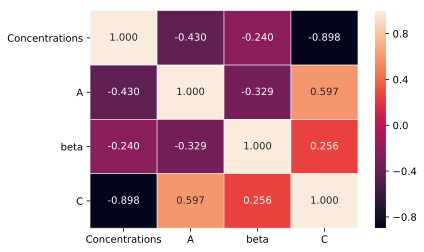

In [35]:
import seaborn as sns
sns_plot = sns.heatmap(df_dict['Pixel 1'].corr(), annot=True, fmt=".3f", linewidths=0.5)
sns_plot.figure.savefig("corrfig1.png")

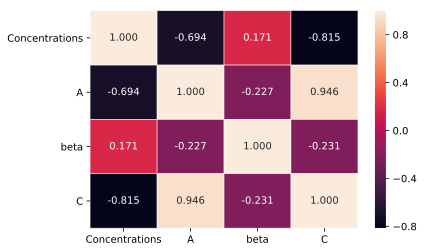

In [36]:
sns_plot = sns.heatmap(df_dict['Pixel 3'].corr(), annot=True, fmt=".3f", linewidths=0.5)
sns_plot.figure.savefig("corrfig2.png")

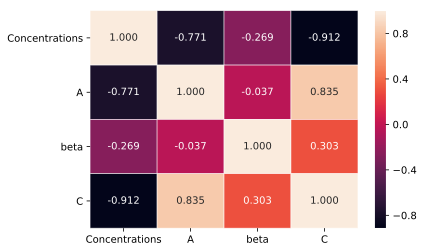

In [37]:
sns_plot = sns.heatmap(df_dict['Pixel 5'].corr(), annot=True, fmt=".3f", linewidths=0.5)
sns_plot.figure.savefig("corrfig3.png")

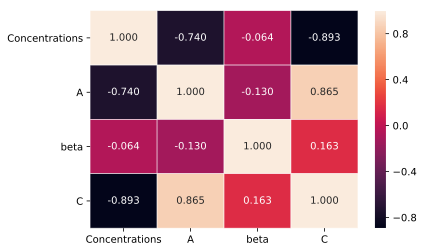

In [38]:
sns_plot = sns.heatmap(df_dict['Pixel 2'].corr(), annot=True, fmt=".3f", linewidths=0.5)
sns_plot.figure.savefig("corrfig4.png")

In [39]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
import random

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def cross_val(reg, X, y, X_test, y_test, stack_cv):
    stacked_test = np.zeros_like(y_test, dtype=float)
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X, y)):
    
        reg.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        stacked_test += reg.predict(X_test)

    stacked_test = stacked_test / stack_cv.n_splits
    return stacked_test

def metrics(y_test, y_cross, metric_type):
    
    if metric_type == 'Mean absolute error':
        return (mean_absolute_error(y_test, y_cross))
    
    elif metric_type == 'RMSE':
        return (mean_squared_error(y_test, y_cross))**0.5
    
    elif metric_type == 'R2 score':
        return r2_score(y_test, y_cross)

[ 2.70997001e+09 -2.43142682e+09] 1936.9637698350032
[ 3.93851567e+08 -5.87633810e+08] 1382.7230442588018
[ 1.43475719e+09 -1.16536433e+09] 949.5991518396007
[ 6.76965620e+09 -2.02526818e+10] 878.2624168605616


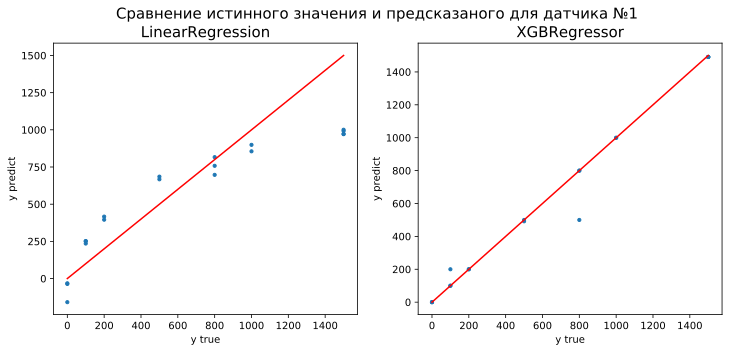

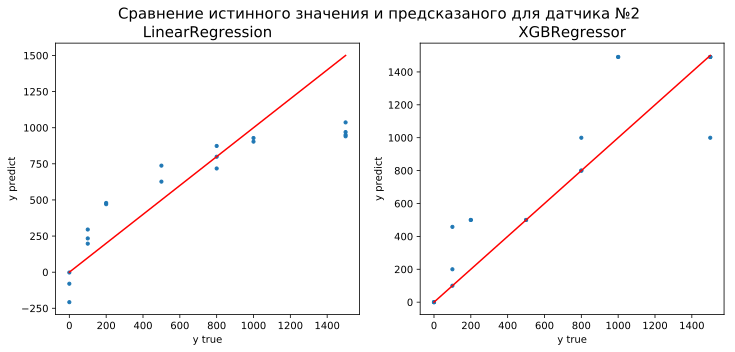

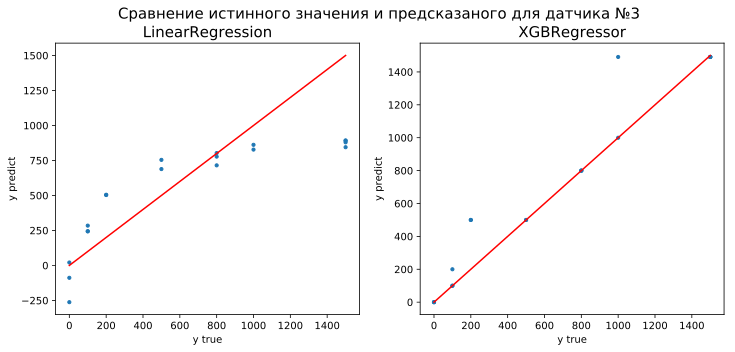

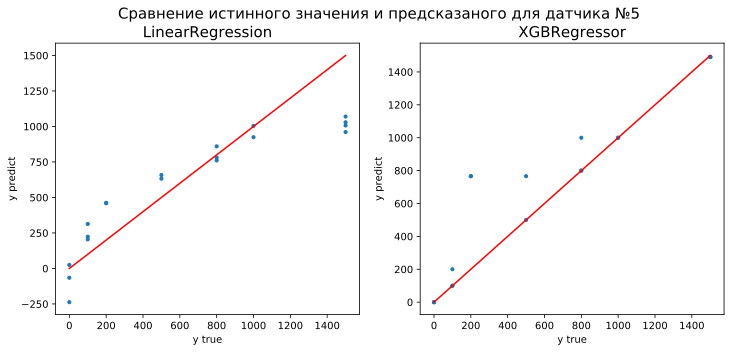

In [41]:
result_test_df = pd.DataFrame()
result_train_df = pd.DataFrame()

for pixel in pixels:    
    X = df_dict[pixel][['A', 'C']]
    y = df_dict[pixel]['Concentrations']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=22)

    xgbreg = XGBRegressor(objective='reg:squarederror')

    xgbreg.fit(X_train, y_train)
    y_test_predict_xgbreg = xgbreg.predict(X_test)
    y_train_predict_xgbreg = xgbreg.predict(X_train)
    
    linreg = LinearRegression()

    linreg.fit(X_train, y_train)
    y_test_predict_linreg = linreg.predict(X_test)
    y_train_predict_linreg = linreg.predict(X_train)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    fig.suptitle('Сравнение истинного значения и предсказаного для датчика №{}'.format(pixel[-1]), fontsize=15)
    
    axes[1].set_xlabel('y true')
    axes[1].set_ylabel('y predict')
    axes[1].scatter(y_test, y_test_predict_xgbreg, s=10)
    axes[1].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
    axes[1].set_title('XGBRegressor', fontsize=15)
    
    axes[0].set_xlabel('y true')
    axes[0].set_ylabel('y predict')
    axes[0].scatter(y_test, y_test_predict_linreg, s=10)
    axes[0].plot(np.linspace(0, y_test.max(), 2), np.linspace(0, y_test.max(), 2), color='red')
    axes[0].set_title('LinearRegression', fontsize=15)

    plt.savefig('{}'.format(pixel))

    predicts = [y_test_predict_xgbreg, y_test_predict_linreg]
    regs = [xgbreg, linreg]

    index = ['XGBRegressor', 'LinearRegression']
    metrics_columns = ['Mean absolute error', 'RMSE', 'R2 score']
    metrics_scores_test = np.zeros(6).reshape(2,3)
    metrics_scores_train = np.zeros(6).reshape(2,3)

    from sklearn.model_selection import StratifiedKFold

    stack_cv = StratifiedKFold(n_splits=5, random_state=22)

    for i in range(0, len(regs)):
        y_test_cross = cross_val(regs[i], X_train, y_train, X_test, y_test, stack_cv)
        y_train_cross = cross_val(regs[i], X_train, y_train, X_train, y_test, stack_cv)
        for k in range(0, len(metrics_columns)):
            metrics_scores_test[i][k] = metrics(y_test, y_test_cross, metric_type=metrics_columns[k])
            metrics_scores_train[i][k] = metrics(y_train, y_train_cross, metric_type=metrics_columns[k])

        
#     import random
#     RMSE = 0
#     MAE = 0
#     r2 = 0
#     for i in range(0, 1000):
#         a = random.sample(range(0,1500), 19)
#         RMSE += sqrt(mean_squared_error(y_test, a))/1000
#         MAE += mean_absolute_error(y_test, a)/1000
#         r2 += r2_score(y_test, a)/1000

   #random = pd.DataFrame({'Random':[MAE, RMSE, r2]}).T
   #random.columns = metrics_columns

    metrics_test_df = pd.DataFrame(metrics_scores_test, index=index, columns=metrics_columns)
   # metrics_test_df = pd.concat([metrics_test_df, random])
    result_test_df = pd.concat([result_test_df, metrics_test_df])
    
    metrics_train_df = pd.DataFrame(metrics_scores_train, index=index, columns=metrics_columns)
    result_train_df = pd.concat([result_train_df, metrics_train_df])
    
    print(linreg.coef_, linreg.intercept_)

In [42]:
result_test_df

,Mean absolute error,RMSE,R2 score
XGBRegressor,50.481984,78.613693,0.979839
LinearRegression,204.749809,263.081039,0.774215
XGBRegressor,152.973982,221.892289,0.839380
LinearRegression,213.824701,275.435573,0.752511
XGBRegressor,91.611843,140.758196,0.935366
LinearRegression,255.714507,328.490090,0.647985
XGBRegressor,99.547794,170.853962,0.904772
LinearRegression,193.176084,251.585527,0.793515


In [43]:
result_train_df

,Mean absolute error,RMSE,R2 score
XGBRegressor,14.645647,31.275395,0.994986
LinearRegression,146.631249,186.016063,0.822617
XGBRegressor,17.356086,33.670540,0.994188
LinearRegression,142.875044,189.597803,0.815720
XGBRegressor,17.864364,33.792536,0.994146
LinearRegression,185.894206,233.457300,0.720600
XGBRegressor,17.269983,33.013145,0.994413
LinearRegression,122.542860,174.660434,0.843613
